# Business Understanding

- Customer churn(Shows if a customer left/stopped using the service) is a critical issue in the telecom industry, directly impacting revenue, customer acquisition costs, and profitability. Identifying at-risk customers and implementing retention strategies is key to sustaining business growth.

## Problem  Statement
- The company is losing customers, and it needs a way to predict churn before it happens. Understanding why customers leave will help in making data-driven decisions to improve retention.Thus in summary:

 - Regression task: Predict numerical factors that influence churn, such as service usage, customer complaints, or charges
 - Classification task(Main): Predict whether a customer will churn

## Objectives

***General***
1. Predict churn with a classification model to identify high-risk customers
2. Be able to identify the main churn drivers such as service plans and customer service interactions
3. Come up with acttionable retention strategies based on the model's insights
4. Improve customer service by analyzing the impact of service interactions on churn
5. Enhance loyalty and marketing strategies through targeting high churn risk customers with personalized offers

***Regression***

- Identify heavy users who might be at risk of churn if they are dissatisfied with pricing or service.
- Identify customers likely to make multiple complaints, which could signal dissatisfaction before they churn.
-  identifying whether high-bill customers are more likely to churn.
- Predicting churn probability to allow the company to rank customers by churn risk

***Classification***

 -  identify at-risk customers and implement retention strategies.
 - Perform EDA to understand class distribution.
 - Build and train a classification model to predict customer churn
 - Optimize model performance through feature engineering and hyperparameter tuning then select the best performing classifier using F1-score

## Research Questions
1. What are the most significant factors influencing customer churn?

2. Does frequent customer service interaction indicate a higher risk of churn?

3. Do customers with an international plan have a higher churn rate?

4. Can a machine learning model accurately predict churn using available features?

# Data Understanding

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
#Load the dataset
df = pd.read_csv('Churn_tel_data.csv')
df.head() #Evaluate the first 5 rows of the data set to get the general overview


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#Check the statistical summary of the data set
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.info() #To get the general information on the data such as the column names the number of columns and the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
df.shape #To get the number of columns and rows in the entire dataset

(3333, 21)

In [ ]:
#We can check for the unique values especially in categorical data columns
for col in df.select_dtypes(include='object'):
     print(f"{col}: {df[col].nunique()} unique values")
     print(df[col].unique()[:10])  # Display the first  unique values
     print("-" * 40)

state: 51 unique values
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN']
----------------------------------------
phone number: 3333 unique values
['382-4657' '371-7191' '358-1921' '375-9999' '330-6626' '391-8027'
 '355-9993' '329-9001' '335-4719' '330-8173']
----------------------------------------
international plan: 2 unique values
['no' 'yes']
----------------------------------------
voice mail plan: 2 unique values
['yes' 'no']
----------------------------------------


# Data Cleaning & Preprocessing

## Correct Formats

In [ ]:
#For correct format first Observe the data type
print(df.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [ ]:
#Convert categorical variables to numeric
#Convert 'yes'/'no' categorical variables to binary (0/1)--- Label encoding

df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})


In [ ]:
#Convert churn from boolean to integer (0/1)
df['churn'] = df['churn'].astype(int)

- Reason as to why we convert categorical variables to numeric such as churn from boolean to integer is to:
  - Ensure that we have consistency to avoid unexpected error when training machine learning models
  - To make analysis easier especially when computing metrics
  - Improve model performance

In [ ]:
#Drop the column Phone number since it is not useful for prediction
df.drop(columns=['phone number'], inplace=True)

In [ ]:
#Run data types again to confirm the changes
print(df.dtypes)

state                      object
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object


In [ ]:
#To determine if to drop the column state and area code, we need to see if churn rates vary significantly across the states and area codes
#Churn rate per state
state_churn_rate = df.groupby('state')['churn'].mean().sort_values(ascending=False)
print(state_churn_rate)

state
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
NM    0.096774
ND    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: churn, dtype: float64


In [ ]:
#Churn rate per area code
area_code_churn_rate = df.groupby('area code')['churn'].mean().sort_values(ascending=False)
print(area_code_churn_rate)

area code
510    0.148810
408    0.145585
415    0.142598
Name: churn, dtype: float64


- we see churn rates are almost similar across all area codes this makes it unuseful for prediction thus we will drop it
- For churn across different states it varies which makes the column state somewhat useful thus we will encode it

In [ ]:
#we can do abit of Chi-Square Test to confirm the significant relationship between churn and (state,area code)

#First create contingency tables
state_contingency = pd.crosstab(df['state'], df['churn'])
area_code_contingency = pd.crosstab(df['area code'], df['churn'])

#Run chi_square test
state_chi2, state_p, state_dof, state_expected = chi2_contingency(state_contingency)
area_code_chi2, area_code_p, area_code_dof, area_code_expected = chi2_contingency(area_code_contingency)

print(f"State Chi-Square Statistic: {state_chi2}, p-value: {state_p}")
print(f"Area Code Chi-Square Statistic: {area_code_chi2}, p-value: {area_code_p}")

State Chi-Square Statistic: 83.04379191019663, p-value: 0.002296221552011188
Area Code Chi-Square Statistic: 0.17754069117425395, p-value: 0.9150556960243712


- Interpreting the output:
  - state vs churn chi-square statistic is 83.4 and p-value of 0.0023 thus < 0.05 showing a significant impact on churn meaning we retain the column
  - Area code vs churn chi-square statistic is 0.18, p-value of 0.9151 thus > than 0.05 showing no significant impact meaning we drop the column


In [ ]:
#encode state column --- one hot encoding
df = pd.get_dummies(df, columns=['state'], drop_first=True)

In [ ]:
#drop area code column
df.drop(columns=['area code'], inplace=True)

## Handling NAs (Missing values)

In [ ]:
df.isnull().sum()

,0
account length,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
...,...
state_VT,0
state_WA,0
state_WI,0
state_WV,0


  - We have no missing values in our data

## Handling Duplicates

In [ ]:
df[df.duplicated()].count()

,0
account length,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
...,...
state_VT,0
state_WA,0
state_WI,0
state_WV,0


  - We do not have duplicated values either

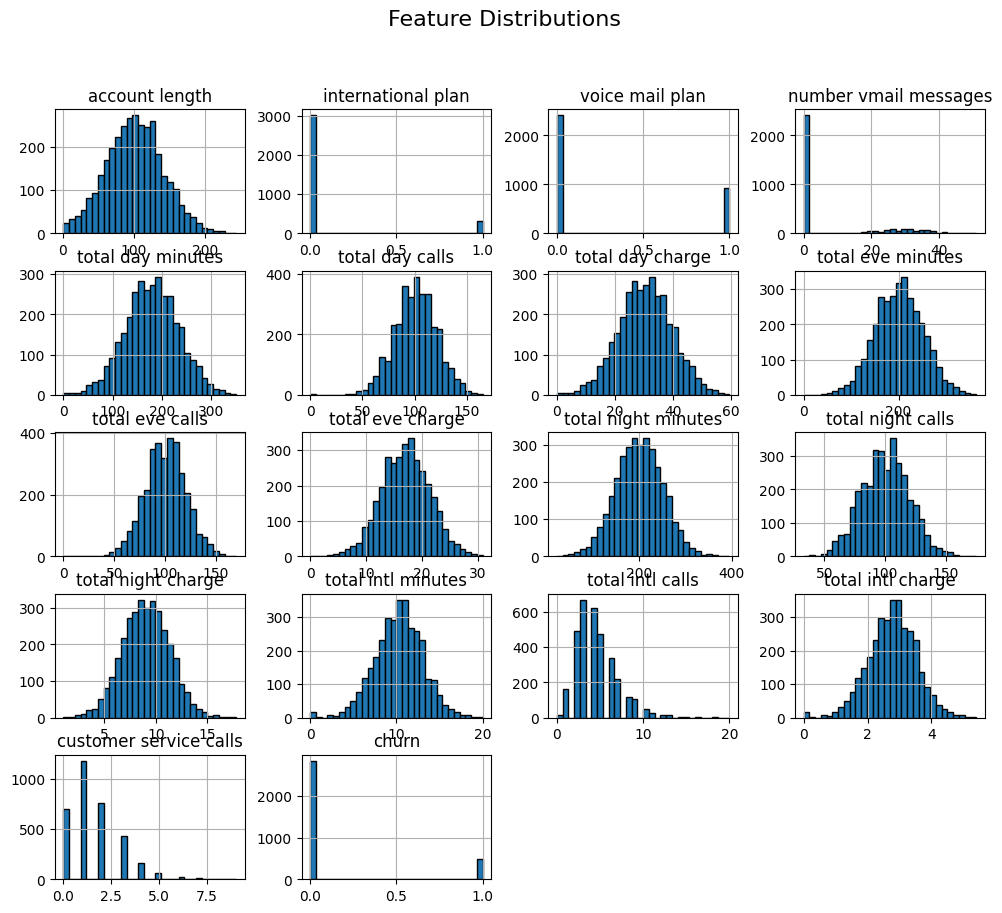

In [ ]:
##Check data Distribution plot histograms
df.hist(figsize=(12,10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


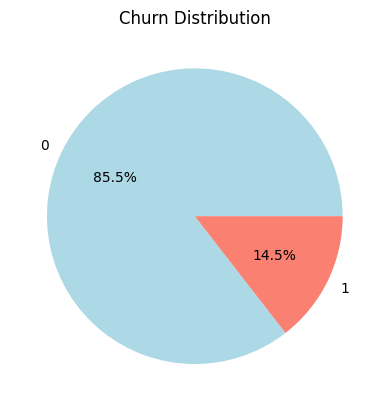

In [ ]:
#Pie chart for categorical distribution
df['churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Churn Distribution")
plt.ylabel("")  # Hide y-label
plt.show()


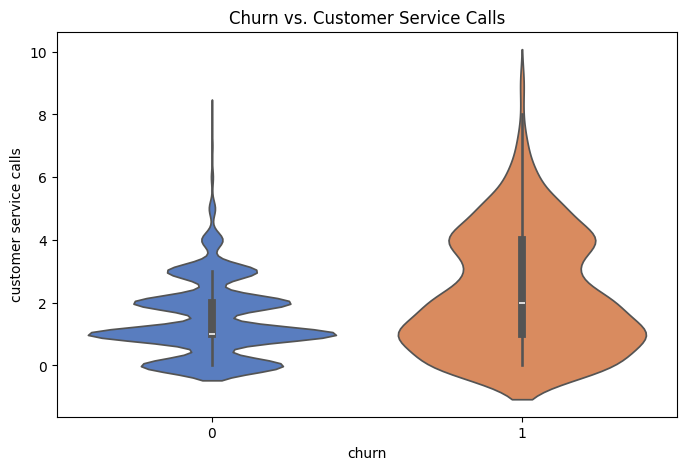

In [ ]:
#violin plot for churn VS customer service calls
plt.figure(figsize=(8, 5))
sns.violinplot(x="churn", y="customer service calls", data=df, palette="muted")
plt.title("Churn vs. Customer Service Calls")
plt.show()


## Outliers
- For this we need to use the visual approach such as boxplots just to see outliers

### Box Plots

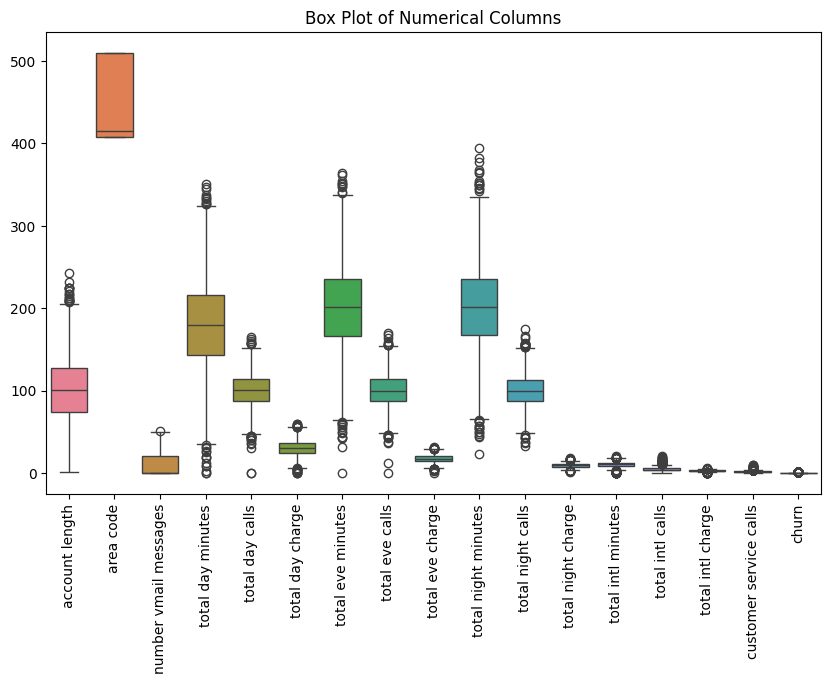

In [ ]:
#Check outliers by plotting a box plot for all numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['state']))
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=90)# rotate for better visibility
plt.show()

- Multiple outliers in several features are detected.
  - Total day minutes, total eve minutes, total night minutes show extreme outliers
  - Total intl calls has fewer outliers but still needs to be worked on.
  - Area code is categorical so should not be analyzed

In [ ]:
#Use Z-score to count outliers on numerical columns
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
threshold = 3
outlier_count = (z_scores > threshold).sum()
print(outlier_count)


account length             7
area code                  0
number vmail messages      3
total day minutes          9
total day calls            9
total day charge           9
total eve minutes          9
total eve calls            7
total eve charge           9
total night minutes       11
total night calls          6
total night charge        11
total intl minutes        22
total intl calls          50
total intl charge         22
customer service calls    35
dtype: int64


- The columns with extreme outliers > 10 need careful handling
- We can either;
   - Remove the outliers using z-score filtering
   - Apply log transformation- but check if data is skewed first

In [ ]:
# Remove rows where any numeric column has a z-score above 3 or below -3
numeric_columns = df.select_dtypes(include=[np.number]).columns
df = df[(np.abs(zscore(df[numeric_columns])) < 3).all(axis=1)]

In [ ]:
#check skewness
# Include only numeric columns for skewness calculation
numeric_df = df.select_dtypes(include=np.number)
df_skew = numeric_df.skew()
print(df_skew)

account length            0.061234
area code                 1.111088
number vmail messages     1.281257
total day minutes        -0.006560
total day calls          -0.018582
total day charge         -0.006562
total eve minutes         0.011379
total eve calls          -0.012807
total eve charge          0.011404
total night minutes      -0.024578
total night calls         0.010321
total night charge       -0.024631
total intl minutes       -0.039414
total intl calls          0.766630
total intl charge        -0.039296
customer service calls    0.723538
dtype: float64


In [ ]:
#Apply log transformation to skewed columns
skewed_columns = ['total day minutes', 'total eve minutes', 'total night minutes']
for col in skewed_columns:
    df[col] = np.log1p(df[col])

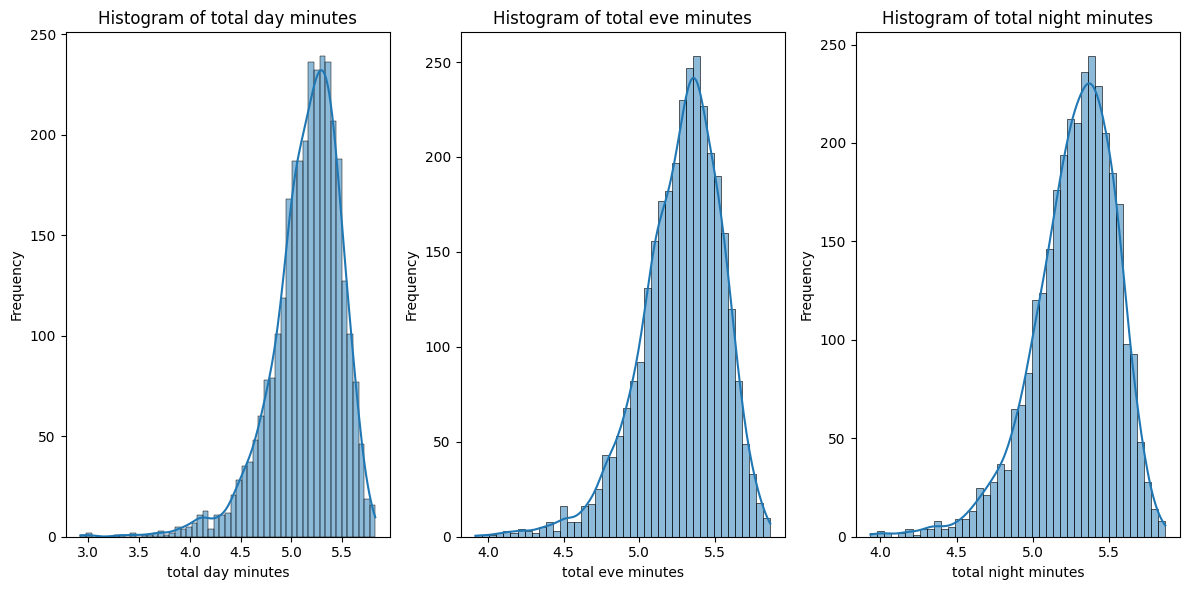

In [ ]:
#We check the distribution again
#Select the transformed columns
transformed_columns = ['total day minutes', 'total eve minutes', 'total night minutes']

#Now we plot the histogram
plt.figure(figsize=(12, 6))
for i, col in enumerate(transformed_columns, 1):
    plt.subplot(1, len(transformed_columns), i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- We still can spot abit of outliers we can perform zscore again to see if the count reduced

In [ ]:
#zscore after log transformation
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
threshold = 3
outlier_count = (z_scores > threshold).sum()
print(outlier_count)

account length             0
area code                  0
number vmail messages      1
total day minutes         47
total day calls            1
total day charge           1
total eve minutes         35
total eve calls            0
total eve charge           2
total night minutes       36
total night calls          0
total night charge         4
total intl minutes         6
total intl calls          28
total intl charge          6
customer service calls     0
dtype: int64


- The outlier count reduced meaning log transformation helped


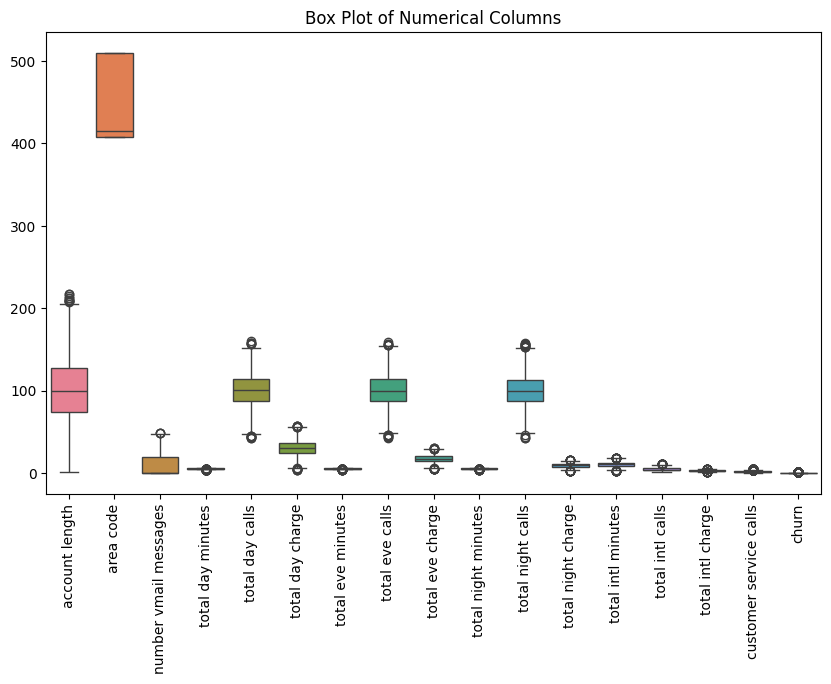

In [ ]:
#Box plot check after log transformaion
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['state']))
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=90)# rotate for better visibility
plt.show()

# Exploratory Data Analysis

## Univariate Analysis

 - Histograms and Boxplots

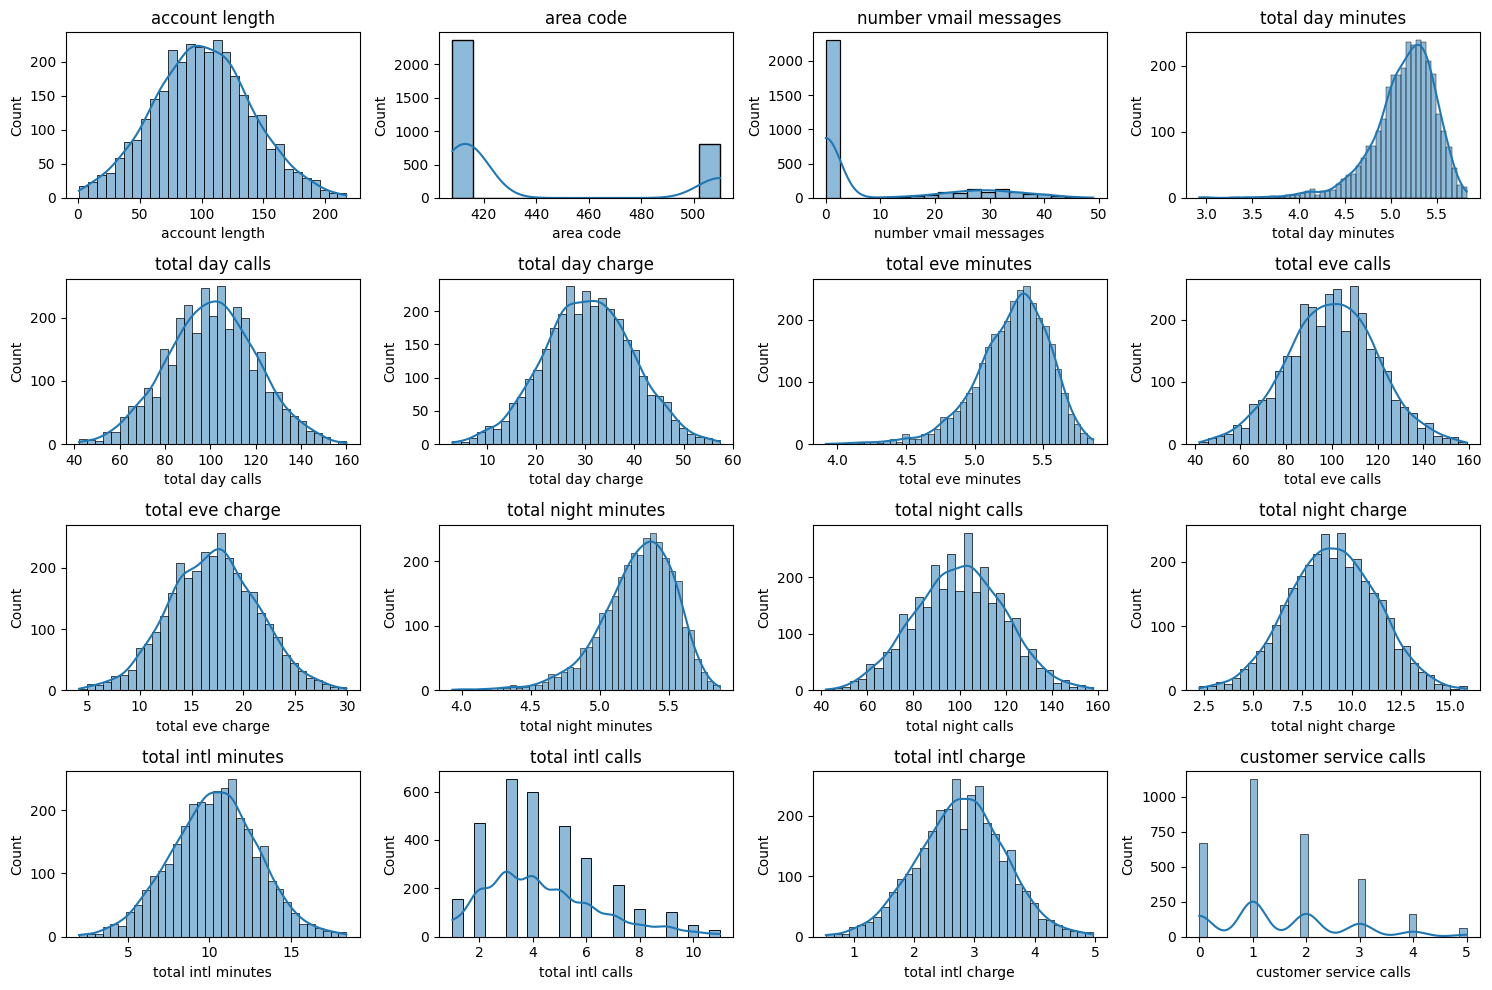

In [ ]:
# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

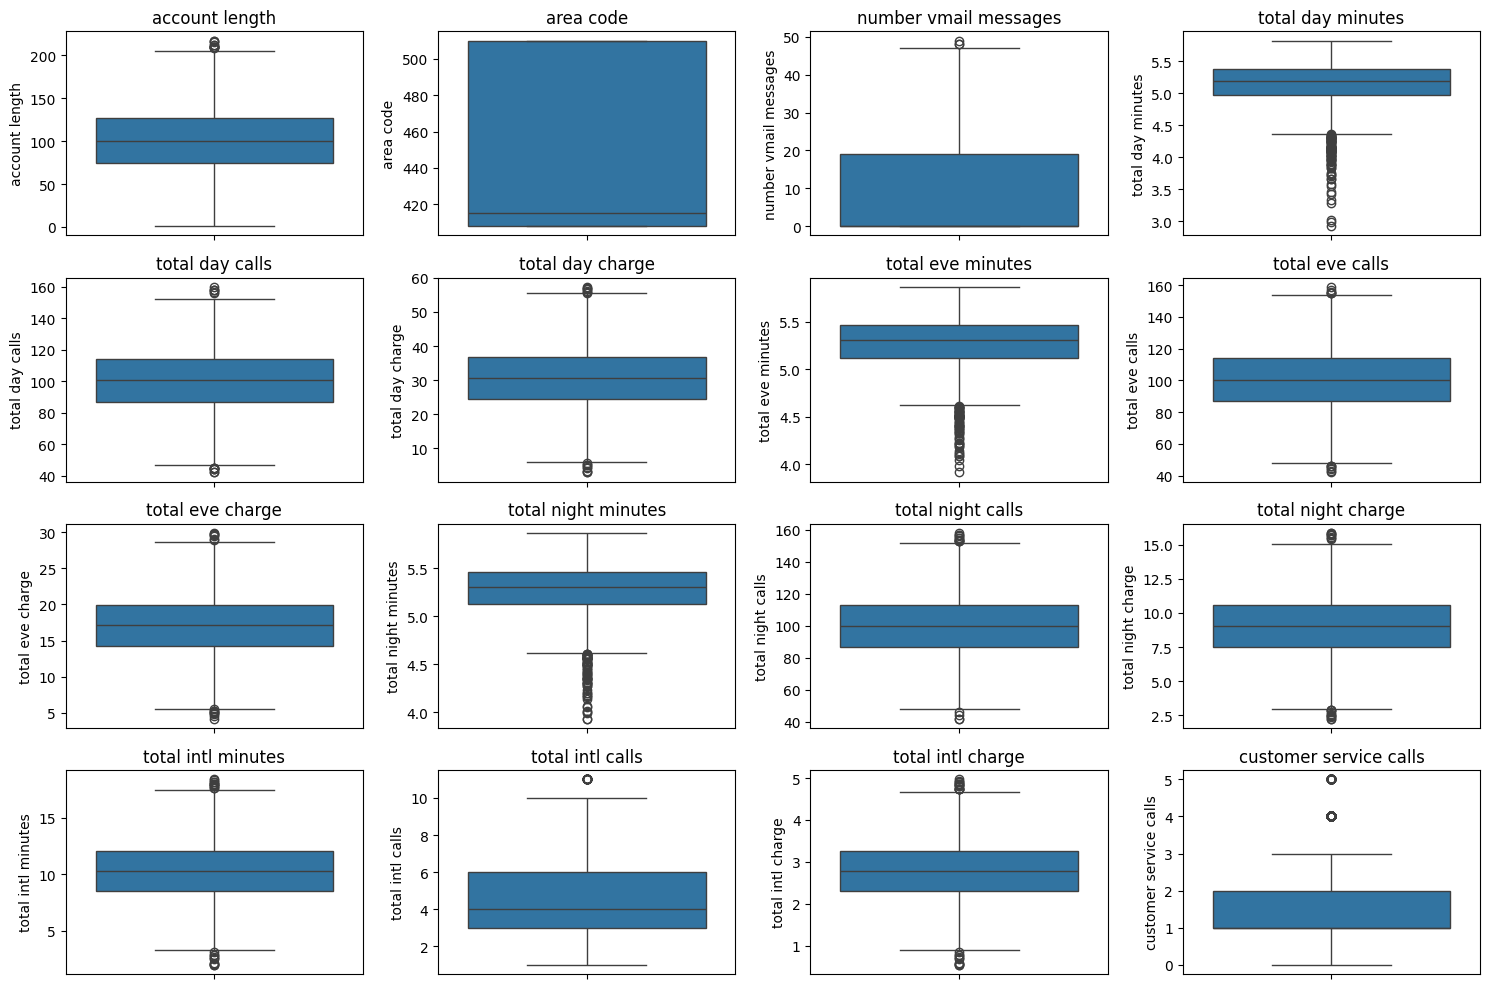

In [ ]:
# Boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])  # Use y= for vertical boxplots
    plt.title(col)
plt.tight_layout()
plt.show()

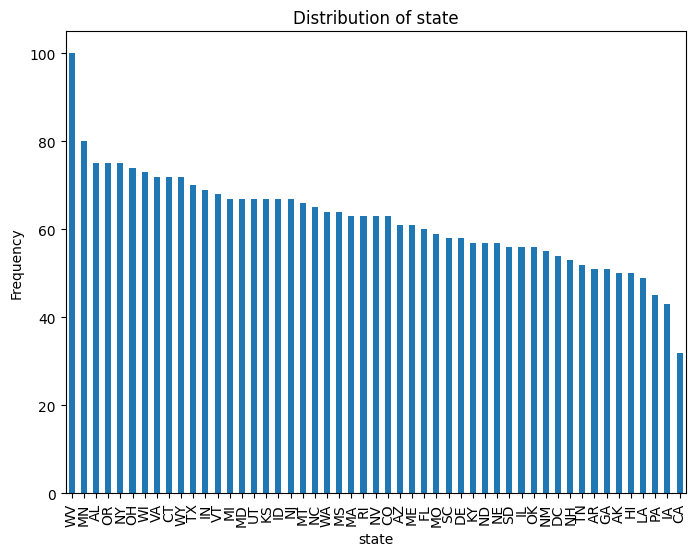

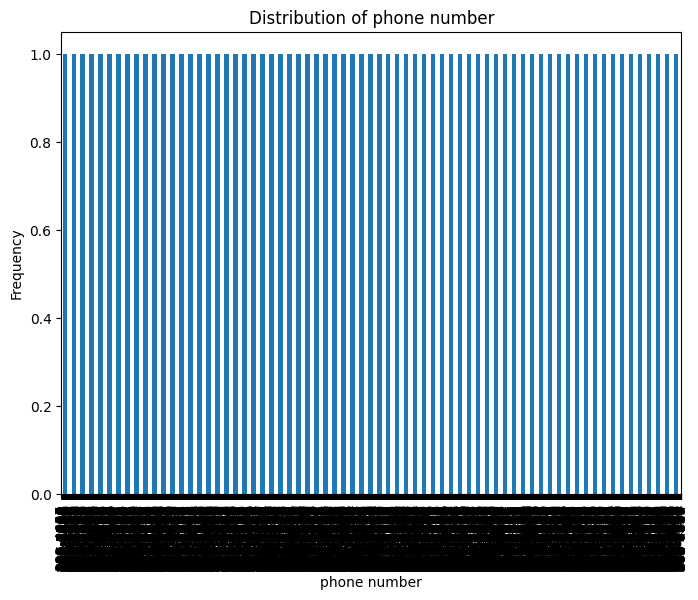

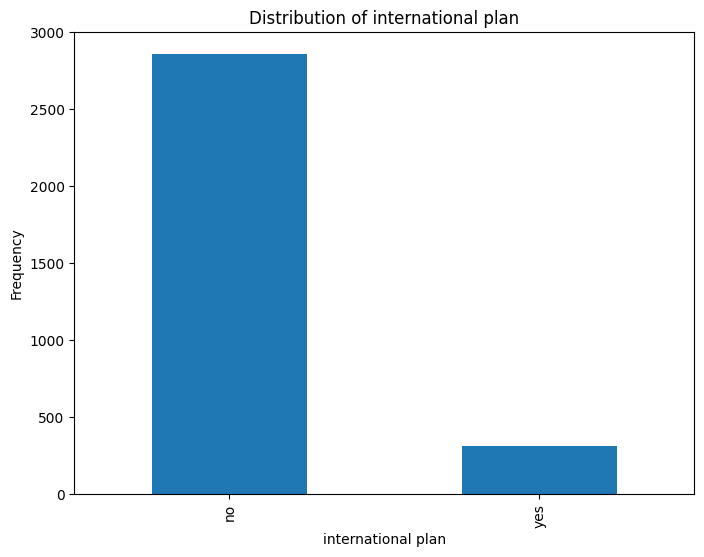

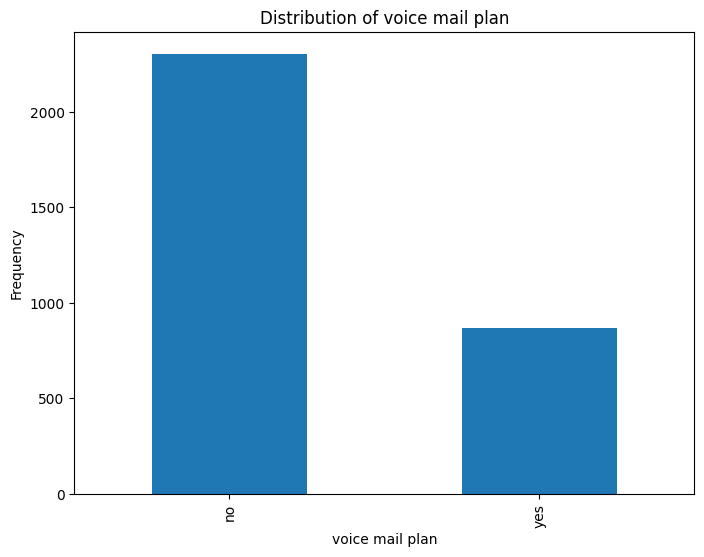

In [ ]:
# Bar plots for categorical features
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Bivariate Analysis

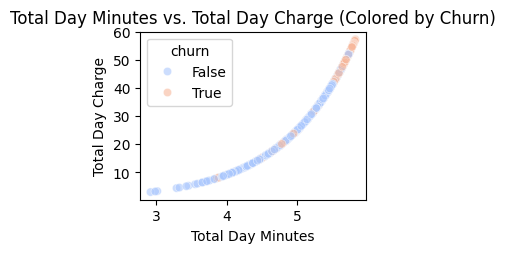

In [ ]:
# bivariate analysis visualization churn vs total day minutes
# Set up the figure and axes
plt.subplot(2, 2, 1)
sns.scatterplot(x=df["total day minutes"], y=df["total day charge"], hue=df["churn"], palette="coolwarm", alpha=0.6)
plt.title("Total Day Minutes vs. Total Day Charge (Colored by Churn)")
plt.xlabel("Total Day Minutes")
plt.ylabel("Total Day Charge")
plt.show()

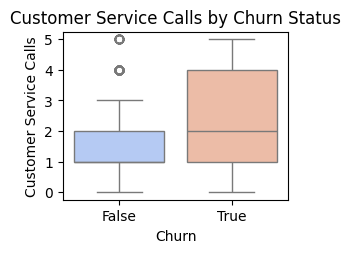

In [ ]:
#Churn vs Customer Service Calls
plt.subplot(2, 2, 2)
sns.boxplot(x="churn", y="customer service calls", data=df, palette="coolwarm")
plt.title("Customer Service Calls by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Customer Service Calls")
plt.show()

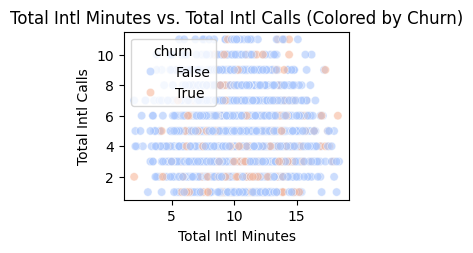

In [ ]:
#  Churn vs Total Intl Minutes & Total Intl Calls
plt.subplot(2, 2, 3)
sns.scatterplot(x=df["total intl minutes"], y=df["total intl calls"], hue=df["churn"], palette="coolwarm", alpha=0.6)
plt.title("Total Intl Minutes vs. Total Intl Calls (Colored by Churn)")
plt.xlabel("Total Intl Minutes")
plt.ylabel("Total Intl Calls")
plt.show()

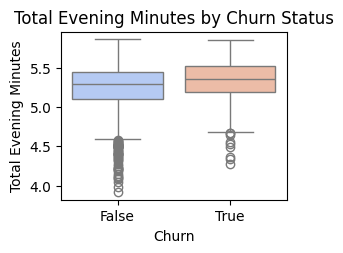

In [ ]:
#  Churn vs. Total Evening Usage
plt.subplot(2, 2, 4)
sns.boxplot(x="churn", y="total eve minutes", data=df, palette="coolwarm")
plt.title("Total Evening Minutes by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Total Evening Minutes")
plt.show()

## Multivariate + Analysis

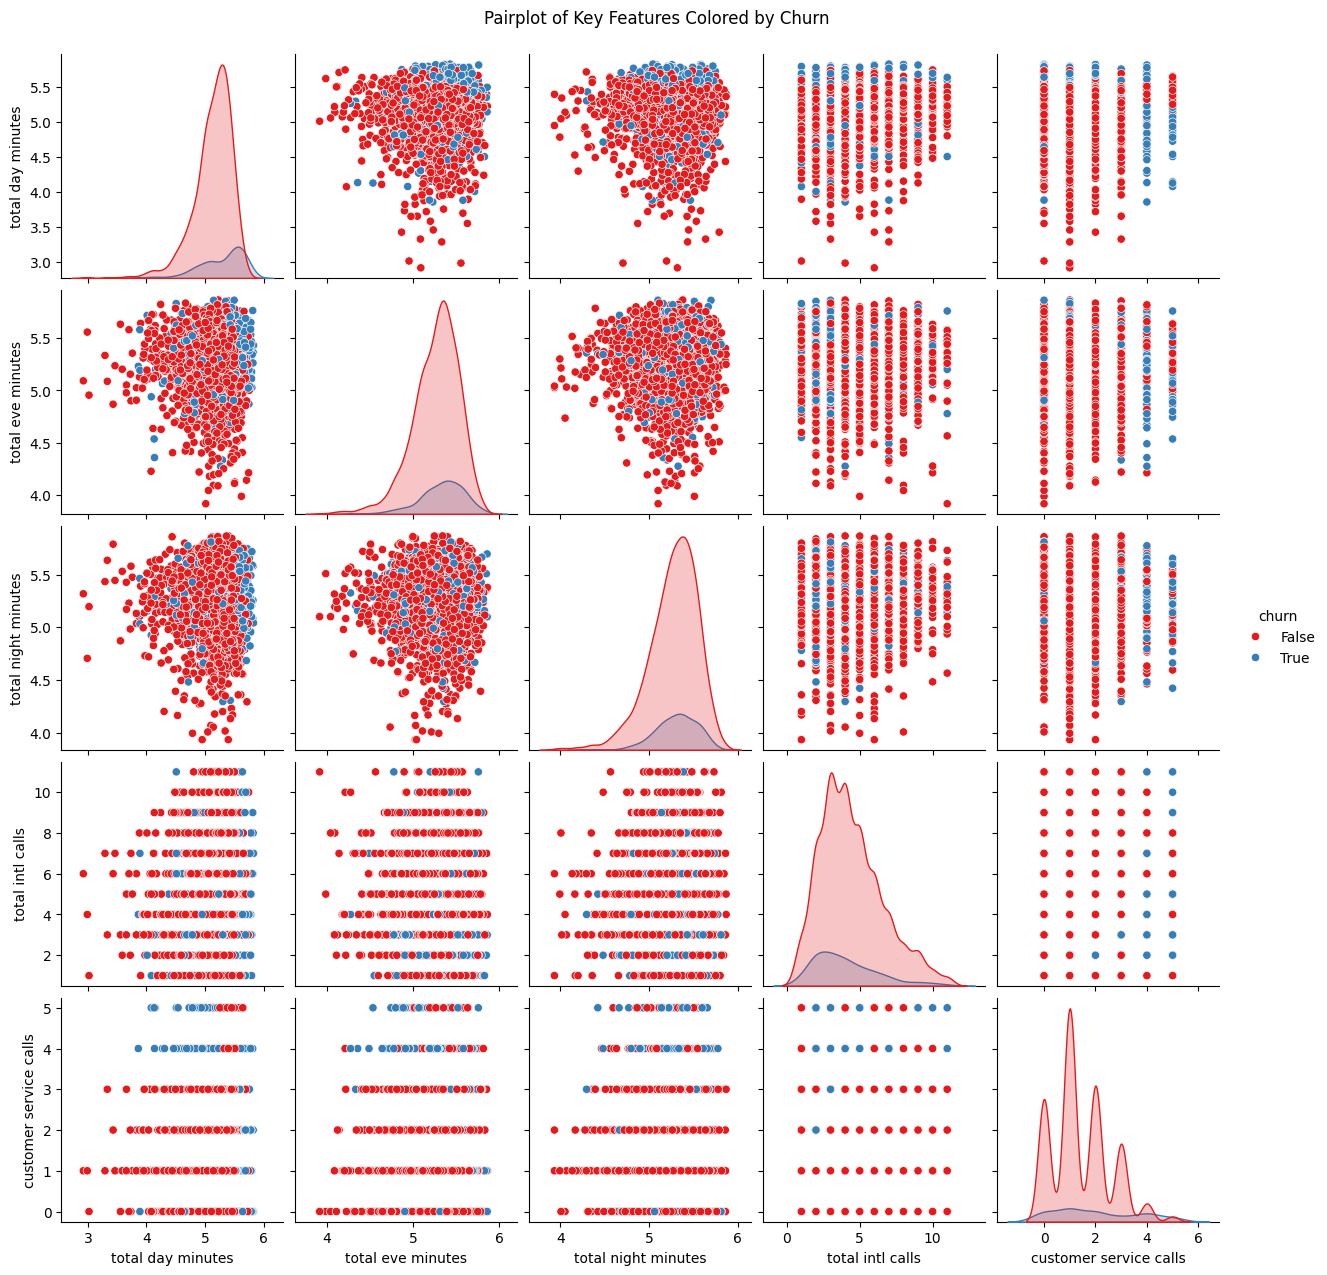

In [ ]:
# Pairplot for multivariate analysis
sns.pairplot(df, hue='churn', vars=['total day minutes', 'total eve minutes', 'total night minutes', 'total intl calls', 'customer service calls'], palette='Set1')
plt.suptitle('Pairplot of Key Features Colored by Churn', y=1.02)
plt.show()

# Feature Engineering
 - This helps improve model accuracy

### Encoding

In [ ]:
#Here we get to use either one hot encoding or label encoding since we are converting categorical data to numerical data as seen below
#label encoding
df['international plan']= df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})


In [ ]:
#One hot encoding esp for multiple category variables
df = pd.get_dummies(df, columns=['state'], drop_first=True)


In [ ]:
#try creating new features to improve predictive power
#Derived code from the internet
df['day_call_ratio'] = df['total day calls'] / df['total day minutes']
df['eve_call_ratio'] = df['total eve calls'] / df['total eve minutes']
df['night_call_ratio'] = df['total night calls'] / df['total night minutes']


In [ ]:
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']


In [ ]:
df['high_service_calls'] = (df['customer service calls'] > 3).astype(int)


- We are trying to identify customers with high risk of churn indicated by customers with > than 3 service calls.

#### Feature Selection
- Helps avoid multicollinearity thus improving model efficiency

In [ ]:
# Identify the column with the problematic value '382-4657'
problematic_column = df.apply(lambda x: x.astype(str).str.contains('382-4657').any()).idxmax()
print(f"Problematic column: {problematic_column}")

# drop the problematic column
df = df.drop(columns=[problematic_column])



Problematic column: phone number


In [ ]:
# Compute correlation matrix, excluding non-numeric columns
corr_matrix = df.select_dtypes(include=np.number).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Dropping these features due to high correlation:", to_drop)

# Drop highly correlated features- redundant features
df = df.drop(columns=to_drop)

Dropping these features due to high correlation: ['number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'day_call_ratio', 'eve_call_ratio', 'night_call_ratio', 'total minutes']


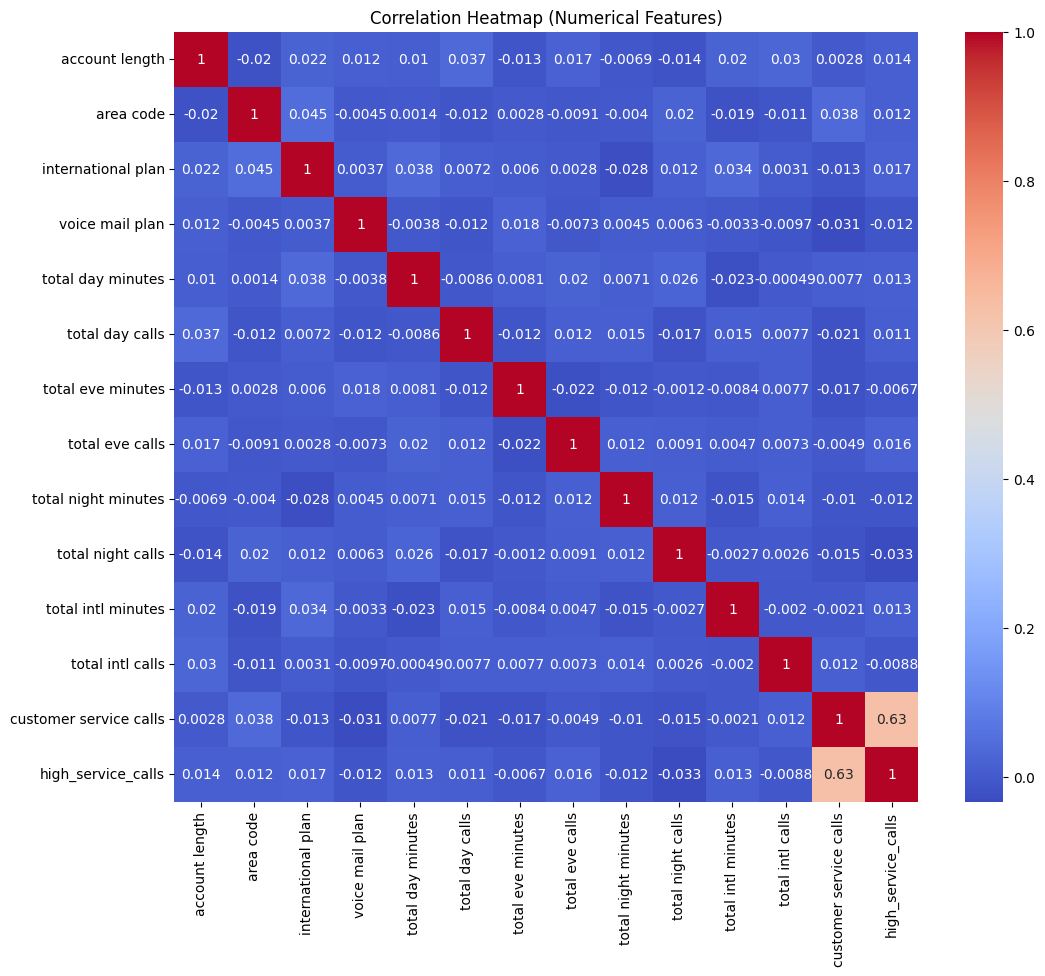

In [ ]:
#Correlation Heatmap
numerical_features = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

- there appears to be a class imbalance in the 'churn' variable, with significantly more non-churned customers than churned customers.  
- This imbalance needs to be addressed during model training.  Several numerical features show some correlation with 'churn', suggesting they could be useful predictors.  
- The categorical features 'international plan' and 'voice mail plan' also appear to have some influence on churn.
- Missing values are not present in the dataset. Given these observations, a machine learning model may be able to predict churn with reasonable accuracy, but careful model selection, feature engineering, and handling of the class imbalance are crucial for optimal performance.

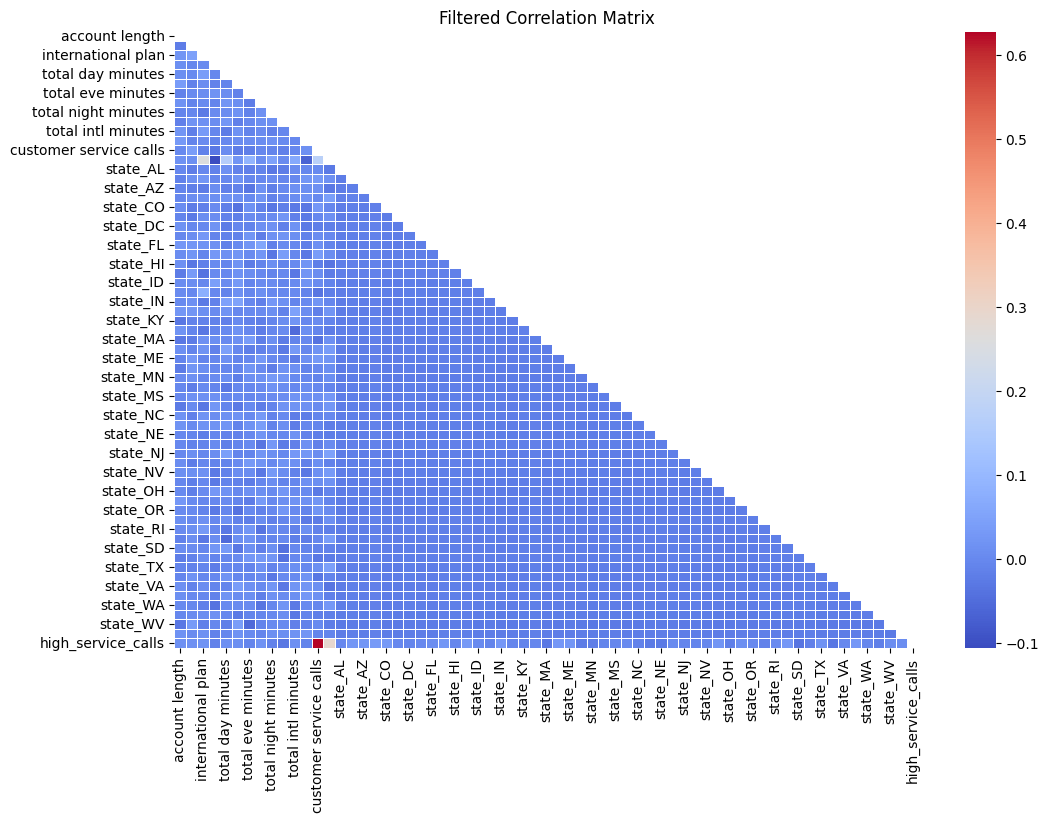

In [ ]:
# Compute correlation matrix
corr = df.corr()

# Mask upper triangle for better visualization
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set figure size
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

plt.title("Filtered Correlation Matrix")
plt.show()


### Feature Scaling
- This is basically for normalization for models like K-NN model
- MinMaxScaler scales values between 0-1

In [ ]:
scaler = MinMaxScaler()
df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']] = scaler.fit_transform(df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']])
df.head()

,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,high_service_calls
0,128,415,0,1,0.917149,110,0.705000,99,0.811916,91,...,False,False,False,False,False,False,False,False,False,0
1,107,415,0,1,0.747357,123,0.700064,103,0.831936,103,...,False,False,False,False,False,False,False,False,False,0
2,137,415,0,0,0.887827,114,0.456387,110,0.601644,104,...,False,False,False,False,False,False,False,False,False,0
3,84,408,1,0,0.958941,71,0.115697,88,0.700056,89,...,False,False,False,False,False,False,False,False,False,0
4,75,415,1,0,0.758002,113,0.559140,122,0.673247,121,...,False,False,False,False,False,False,False,False,False,0


 - We can also perform standardization using the standard scaler for algorithms like Logistic Regression

In [ ]:
scaler = StandardScaler()
df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']] = scaler.fit_transform(df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']])
df.head()

,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,high_service_calls
0,128,415,0,1,1.264273,110,0.057708,99,0.847275,91,...,False,False,False,False,False,False,False,False,False,0
1,107,415,0,1,-0.163682,123,0.022166,103,0.989648,103,...,False,False,False,False,False,False,False,False,False,0
2,137,415,0,0,1.017672,114,-1.732263,110,-0.648118,104,...,False,False,False,False,False,False,False,False,False,0
3,84,408,1,0,1.615748,71,-4.185171,88,0.051756,89,...,False,False,False,False,False,False,False,False,False,0
4,75,415,1,0,-0.074153,113,-0.992459,122,-0.138905,121,...,False,False,False,False,False,False,False,False,False,0


# Modeling



## Regression

In [ ]:
# Reset index to avoid issues after removing rows for outliers
df = df.reset_index(drop=True)

# Define X and y
X = df.drop(columns=['churn'])
y = df['churn']

# Identify object columns
object_columns = X.select_dtypes(include=['object']).columns

# One-hot encode object columns
if len(object_columns) > 0:
    X = pd.get_dummies(X, columns=object_columns, drop_first=True)  # Use drop_first=True to avoid multicollinearity

# Add a constant to the independent variables
X = sm.add_constant(X)



In [ ]:
# Convert boolean columns to integers
X = X.astype({col: 'int' for col in X.select_dtypes(include=['bool']).columns})

# Drop columns containing 'phone number' if they exist
X = X.drop(columns=[col for col in X.columns if 'phone number' in col], errors='ignore')

# One-hot encoding for remaining categorical columns
# Check and convert columns with 'object' dtype to numeric before applying get_dummies
for col in X.select_dtypes(include=['object']).columns:
    X[col] = pd.to_numeric(X[col], errors='coerce') # Convert to numeric, handling errors

X = pd.get_dummies(X, drop_first=True, dummy_na=False)  # dummy_na=False to avoid creating dummies for NaN

# Convert to numeric, replacing inf and NaN with a large and small number
X = X.apply(pd.to_numeric, errors='coerce').replace([np.inf, -np.inf], np.nan)
X.fillna(X.mean(), inplace=True) # Impute NaN with column means


In [ ]:
print(X.isnull().sum().sum())  # Total NaN count
print(X.isnull().sum())  # Check per column


0
const                 0
account length        0
area code             0
international plan    0
voice mail plan       0
                     ..
state_WA              0
state_WI              0
state_WV              0
state_WY              0
high_service_calls    0
Length: 65, dtype: int64


In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')  # Convert all non-numeric to NaN
X.fillna(X.mean(), inplace=True)  # Fill any new NaNs that appeared


In [ ]:
print("Remaining NaNs:", X.isnull().sum().sum())
print("Remaining Infs:", np.isinf(X).sum().sum())
print("Data Types:", X.dtypes.unique())  # Should only show int64 and float64


Remaining NaNs: 0
Remaining Infs: 0
Data Types: [dtype('float64') dtype('int64')]


In [ ]:
print(X.isnull().sum())  # Check NaNs per column


const                 0
account length        0
area code             0
international plan    0
voice mail plan       0
                     ..
state_WA              0
state_WI              0
state_WV              0
state_WY              0
high_service_calls    0
Length: 65, dtype: int64


In [ ]:
#Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     13.85
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          4.20e-125
Time:                        04:43:14   Log-Likelihood:                -739.39
No. Observations:                3169   AIC:                             1609.
Df Residuals:                    3104   BIC:                             2003.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
#Calculate the metrics
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 0.09336482081621159
RMSE: 0.3055565754753309
MAE: 0.20483555424902758
R²: 0.22210614792175898


- The above RMSE output means that the model is making prediction errors of around 31% on average
- An R² of 0.2221 that is 22.21% can be explained by the models features however they may not be strong predictors of churn
- MAE suggests that the model on average is 20% off from the true values of churn
  
  - The above shows that churn is a binary classification problem not continuous hence the model is not capturing enough variance

## Classification

### Logistic Regression

In [ ]:
#Define features X and target y
X = df.drop(columns=['churn'])
y = df['churn']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of the column

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

#Initialize and train the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

In [ ]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

#Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8470031545741324
Recall: 0.05102040816326531
Precision: 0.5555555555555556
F1 Score: 0.09345794392523364
              precision    recall  f1-score   support

       False       0.85      0.99      0.92       536
        True       0.56      0.05      0.09        98

    accuracy                           0.85       634
   macro avg       0.70      0.52      0.50       634
weighted avg       0.81      0.85      0.79       634



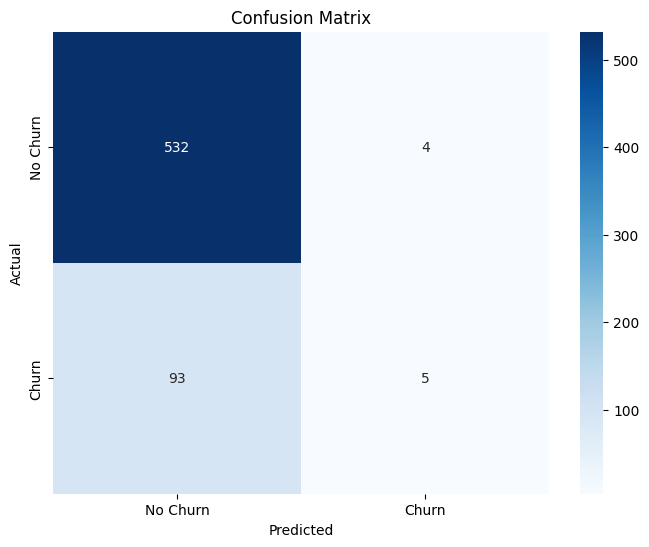

In [ ]:
#Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

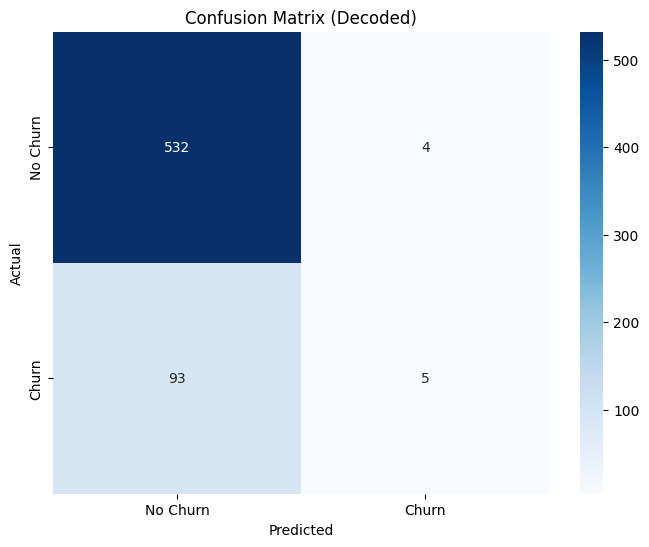

In [ ]:
#Decode the predictions and true labels
y_pred_decoded = np.where(y_pred == 1, 'Churn', 'No Churn')
y_test_decoded = np.where(y_test == 1, 'Churn', 'No Churn')

#plot the confusion matrix with decoded labels
cm= confusion_matrix(y_test_decoded, y_pred_decoded, labels=['No Churn', 'Churn'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix (Decoded)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- From the Logistic regression model results we get a good accuracy of 84.7%
- Recall however is very low at 5% meaning the model is missing a lot of customers who actually churn
- F1-Score is low as well indicating a poor balance
- Prediction is at 55% which is moderate
- Let's try another model

In [ ]:
#Tune the logistic model
#Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']
}

#Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

#Fit the grid search to the data
grid_search.fit(X_train, y_train)

#Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score}")

#Train a new model with the best hyperparameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = best_model.predict(X_test)

#Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.865483234714004


- Accuracy moved up to 86.55% which was an improvement
- Penalty L2 that is Ridge regression helps prevent overfitting
- C= 0.01 controls regularization and smaller values give stronger regularization

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      1.00      0.92       536
        True       0.00      0.00      0.00        98

    accuracy                           0.84       634
   macro avg       0.42      0.50      0.46       634
weighted avg       0.71      0.84      0.77       634



- Model seems not to be classifying churn at all thus not suitable for churn prediction

### Decision Tree

In [ ]:
#Initialize and train the decision tree classsifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = dt_model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

#Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9116719242902208
Recall: 0.7142857142857143
Precision: 0.7142857142857143
F1 Score: 0.7142857142857143
              precision    recall  f1-score   support

       False       0.95      0.95      0.95       536
        True       0.71      0.71      0.71        98

    accuracy                           0.91       634
   macro avg       0.83      0.83      0.83       634
weighted avg       0.91      0.91      0.91       634



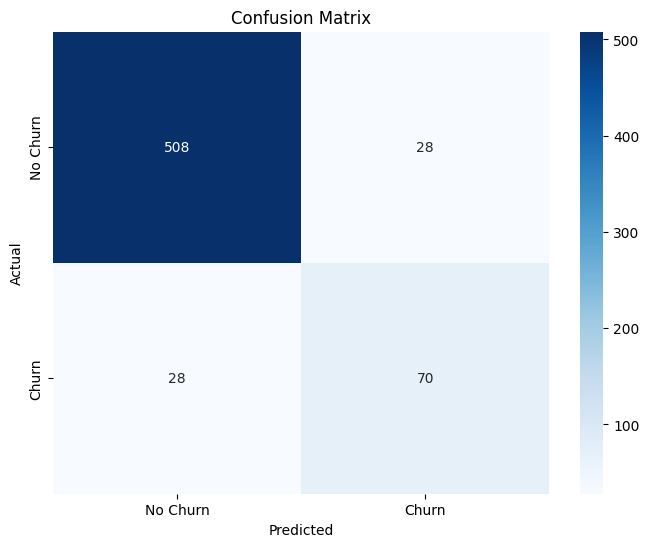

In [ ]:
#Plot a confusion matrix
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

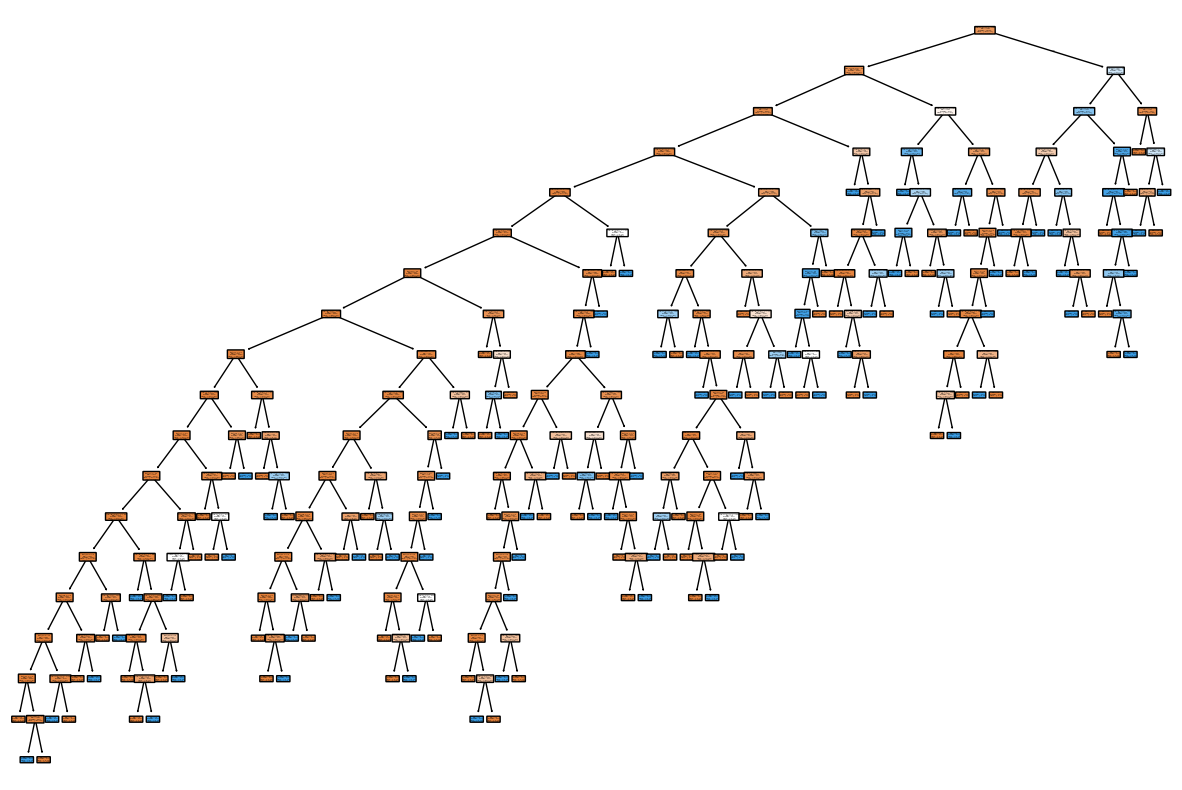

In [ ]:
#Plot decision tree
from sklearn.tree import plot_tree

#Assuming dt_model is your trained DecisionTreeClassifier
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Churn', 'Churn'], rounded=True, proportion=True)
plt.show()

- Accuracy is at 90.85% which means the model is performing well
- Recall is at 70% which means the model is getting 70% of actual churn cases
- Precision is at 70% as well which means when the model predicts churn it is correct 70% of the time
- F1-score is at 70% as well showing a well optimized model for predicting churn

In [ ]:
#Tune the decision tree model
#Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

#Fit the grid search to the data
grid_search.fit(X_train, y_train)

#Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score}")

#Train a new model with the best hyperparameters
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = best_model.predict(X_test)

#Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Print classification report
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy: 0.9439842209072978
              precision    recall  f1-score   support

       False       0.94      0.97      0.95       536
        True       0.79      0.68      0.73        98

    accuracy                           0.92       634
   macro avg       0.87      0.83      0.84       634
weighted avg       0.92      0.92      0.92       634



- After tuning the model improved its accuracy by 4%
- Precision improved as well up to 79%
- Recall moved down to 69%
- F1-score moved up to 74% showing a balance of precision and recall


### Random Forest

In [ ]:
#Initialize and train the random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = rf_model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

#Classificattion report
print(classification_report(y_test, y_pred))

Accuracy: 0.9274447949526814
Recall: 0.6020408163265306
Precision: 0.8939393939393939
F1 Score: 0.7195121951219512
              precision    recall  f1-score   support

       False       0.93      0.99      0.96       536
        True       0.89      0.60      0.72        98

    accuracy                           0.93       634
   macro avg       0.91      0.79      0.84       634
weighted avg       0.93      0.93      0.92       634



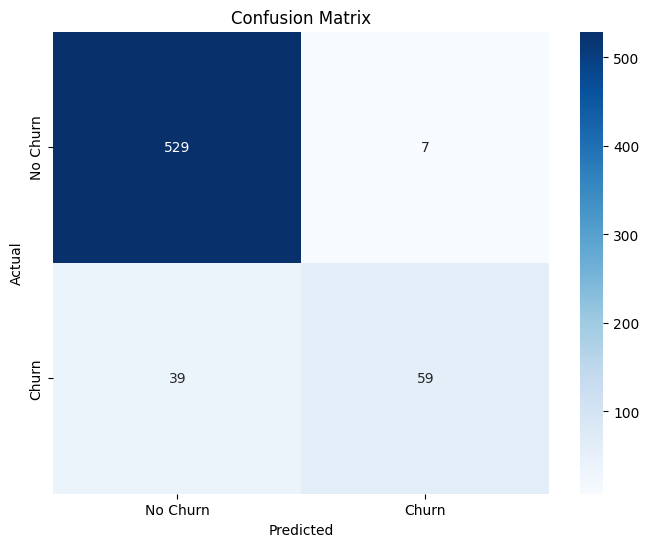

In [ ]:
#Plot a confusion matrix
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Accuracy has improved to 92.7% with random forest giving more correct predictions overall.
- we have a higher precision 90% meaning when it predicts churn it is highly correct
- A lower recall of 59% however showing the model is missing more churn cases
- F1-score of 71% shows there is balance

- After tuning the Random Forest Model the accuracy is at 93%
- Recall is at 63% which is lower thus the model misses 37% of the churn cases
- F1-score shows random forest is well balanced than the other models
- High precision of 91% may indicate that the model igores false alarms while predicting churn

In [ ]:
#Tune the random forest model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Initialize a GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

#Fit the grid search to the data
grid_search.fit(X_train, y_train)

#Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score}")

#Train a new model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = best_model.predict(X_test)

#Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Classification Report
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9368836291913215
              precision    recall  f1-score   support

       False       0.94      0.99      0.96       536
        True       0.90      0.64      0.75        98

    accuracy                           0.93       634
   macro avg       0.92      0.81      0.86       634
weighted avg       0.93      0.93      0.93       634



### K-NN model

Accuracy: 0.8296529968454258
Recall: 0.02040816326530612
Precision: 0.14285714285714285
F1 Score: 0.03571428571428571
              precision    recall  f1-score   support

       False       0.85      0.98      0.91       536
        True       0.14      0.02      0.04        98

    accuracy                           0.83       634
   macro avg       0.49      0.50      0.47       634
weighted avg       0.74      0.83      0.77       634



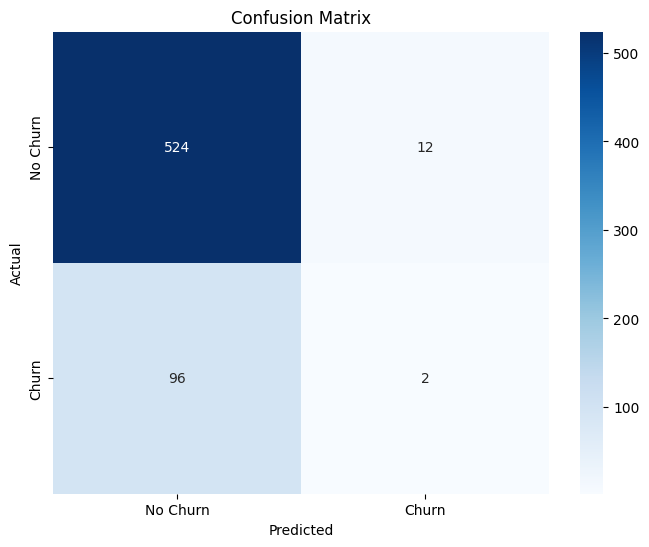

In [ ]:
#Initialize and train the K-NN classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = knn_model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

#Classification report
print(classification_report(y_test, y_pred))

#Plot confusion matrix
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- The accuracy looks good at 82.96% but might be misleading
- Precision is at 14% which means when predicting churn it is only correct 14% of the time
- 2% recall shows the model rarely detects churn cases
- F1-score 0f 3.6% shows very poor balance between precision and recall

In [ ]:
#Tune the K-NN model
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

#Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

#Fit the grid search to the data
grid_search.fit(X_train, y_train)

#Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score}")

#Train a new model with the best hyperparameters
best_model = KNeighborsClassifier(**best_params)
best_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = best_model.predict(X_test)

#Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

#Classification report
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Accuracy: 0.8642998027613412
Accuracy: 0.8406940063091483
Recall: 0.0
Precision: 0.0
F1 Score: 0.0
              precision    recall  f1-score   support

       False       0.84      0.99      0.91       536
        True       0.00      0.00      0.00        98

    accuracy                           0.84       634
   macro avg       0.42      0.50      0.46       634
weighted avg       0.71      0.84      0.77       634



- Even after tuning the model still does not improve

### SVM



Accuracy: 0.8454258675078864
Recall: 0.0
Precision: 0.0
F1 Score: 0.0
              precision    recall  f1-score   support

       False       0.85      1.00      0.92       536
        True       0.00      0.00      0.00        98

    accuracy                           0.85       634
   macro avg       0.42      0.50      0.46       634
weighted avg       0.71      0.85      0.77       634



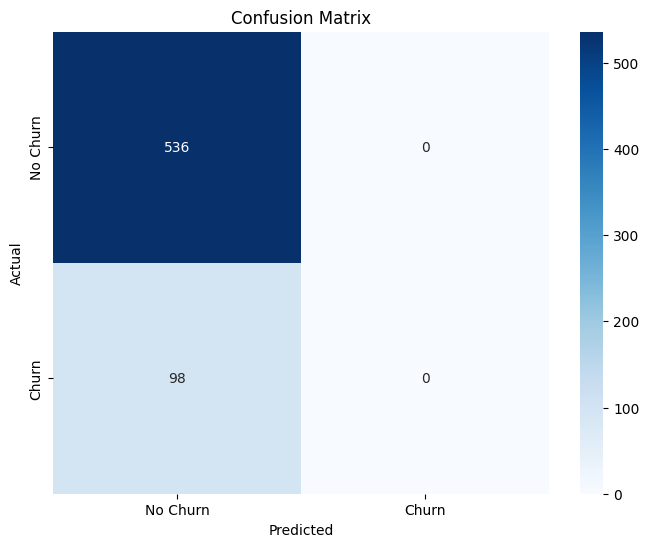

In [ ]:
#Define features (X) and (y)
X= df.drop(columns=['churn'])
y= df['churn']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train te SVC model
svm_model = SVC()
svm_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = svm_model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

#Classification report
print(classification_report(y_test, y_pred))

#Plot the confusion matrix
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Just like the K-NN model, the SVM model also shows poor results when it comes to recall and precision which means the model rarely predicts customer churn

## Hyperparameter Tuning

In [ ]:
#So far the best model is the Decision Tree
#Tune the decision tree model
#Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

#Fit the grid search to the data
grid_search.fit(X_train, y_train)

#Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score}")

#Train a new model with the best hyperparameters
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = best_model.predict(X_test)

#Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Print classification report
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Accuracy: 0.944378698224852
              precision    recall  f1-score   support

       False       0.94      0.97      0.96       536
        True       0.80      0.68      0.74        98

    accuracy                           0.92       634
   macro avg       0.87      0.83      0.85       634
weighted avg       0.92      0.92      0.92       634



# Model Evaluation

- The best model to predict customer churn is the tuned Decison Tree Model
- The Accuracy is high at 94.4% meaning good overall prediction
- Precision is  at 79% meaning when it predicts churn it is almost 80% correct
- Recall is still low at 69% meaning the model still misses some churners
- F1-score is well balanced at 74%

#### Class Weighting

In [ ]:
# Define custom class weights
# Adjust the ratio based on churn distribution
custom_weights = {0: 1, 1: 3}

# Initialize Decision Tree with custom weights
dt_custom = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    class_weight=custom_weights,
    random_state=42
)

# Train and evaluate
dt_custom.fit(X_train, y_train)
y_pred_custom = dt_custom.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

       False       0.95      0.94      0.94       536
        True       0.68      0.72      0.70        98

    accuracy                           0.90       634
   macro avg       0.81      0.83      0.82       634
weighted avg       0.91      0.90      0.91       634



- Accuracy is still strong 90% after class weighting to improve recall
- Recall significantly improved to 72% meaning the model is better at catching churners
- Precision dropped to 68% but that indicates some churners are false positives
- F1-score improved 70% which indicates better balance between recall and precision

# Conclusion and Recommendation

- The Tuned Decision Tree model is better at predicting customer churn given the strong recall and accuracy this model is ready for real world use.
- For the business more customer retention methods/Strategies can be applied early such as personalized offers/discounts or the customer support outreach
- Further model improvemments such as SMOTE to better balance the recall and precision might be needed since a high recall ensures feweer lost customers and thus reducing revenue loss
- As an additional recommendation the company can explore additional features such as customer engagement patterns.


# References
- Canvas Notes
- Fawcett, T. (2006). An introduction to ROC analysis. Pattern Recognition Letters, 27(8), 861-874
- Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32.
- Lemmens, A., & Gupta, S. (2020). Managing Churn to Maximize Profits. Foundations and Trends® in Marketing, 14(1), 1-74.
= OpenAI (2025). AI-assisted insights on churn prediction and machine learning modeling

In [ ]:
#Download the clean dataset for tableau
df.to_csv('churn_tel_data.csv', index=False)
from google.colab import files
files.download('churn_tel_data.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>